In [1]:
import pandas as pd
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
df_teams=pd.read_csv('data/teams.csv')
df_teams.drop(columns=['firstRound', 'semis', 'finals', 'rank', 'tmID','lgID', 'franchID', 'name', 'arena', 'divID', 'confID'], inplace=True)
df_teams.head()

,year,playoff,seeded,o_fgm,o_fga,o_ftm,o_fta,o_3pm,o_3pa,o_oreb,...,lost,GP,homeW,homeL,awayW,awayL,confW,confL,min,attend
0,9,N,0,895,2258,542,725,202,598,340,...,30,34,1,16,3,14,2,18,6825,141379
1,10,Y,0,1089,2428,569,755,114,374,404,...,16,34,12,5,6,11,10,12,6950,120737
2,1,N,0,812,1903,431,577,131,386,305,...,24,32,5,11,3,13,5,16,6475,90963
3,2,Y,0,746,1780,410,528,153,428,309,...,14,32,11,5,7,9,15,6,6500,105525
4,3,Y,0,770,1790,490,663,211,527,302,...,14,32,11,5,7,9,12,9,6450,106670


In [3]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = df_teams.select_dtypes(include=['object'])
categorical_features.drop(columns=['playoff'], inplace=True)
categorical_features.info()
encoder = OneHotEncoder()
for feature in categorical_features:
    onehotarray = encoder.fit_transform(df_teams[[feature]]).toarray()
    items = [f'{feature}_{item}' for item in encoder.categories_[0]]
    df_teams[items] = onehotarray
df_teams=df_teams.drop(categorical_features, axis=1)
df_teams.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Empty DataFrame


,year,playoff,seeded,o_fgm,o_fga,o_ftm,o_fta,o_3pm,o_3pa,o_oreb,...,lost,GP,homeW,homeL,awayW,awayL,confW,confL,min,attend
0,9,N,0,895,2258,542,725,202,598,340,...,30,34,1,16,3,14,2,18,6825,141379
1,10,Y,0,1089,2428,569,755,114,374,404,...,16,34,12,5,6,11,10,12,6950,120737
2,1,N,0,812,1903,431,577,131,386,305,...,24,32,5,11,3,13,5,16,6475,90963
3,2,Y,0,746,1780,410,528,153,428,309,...,14,32,11,5,7,9,15,6,6500,105525
4,3,Y,0,770,1790,490,663,211,527,302,...,14,32,11,5,7,9,12,9,6450,106670


In [4]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 50 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      142 non-null    int64 
 1   playoff   142 non-null    object
 2   seeded    142 non-null    int64 
 3   o_fgm     142 non-null    int64 
 4   o_fga     142 non-null    int64 
 5   o_ftm     142 non-null    int64 
 6   o_fta     142 non-null    int64 
 7   o_3pm     142 non-null    int64 
 8   o_3pa     142 non-null    int64 
 9   o_oreb    142 non-null    int64 
 10  o_dreb    142 non-null    int64 
 11  o_reb     142 non-null    int64 
 12  o_asts    142 non-null    int64 
 13  o_pf      142 non-null    int64 
 14  o_stl     142 non-null    int64 
 15  o_to      142 non-null    int64 
 16  o_blk     142 non-null    int64 
 17  o_pts     142 non-null    int64 
 18  d_fgm     142 non-null    int64 
 19  d_fga     142 non-null    int64 
 20  d_ftm     142 non-null    int64 
 21  d_fta     142 no

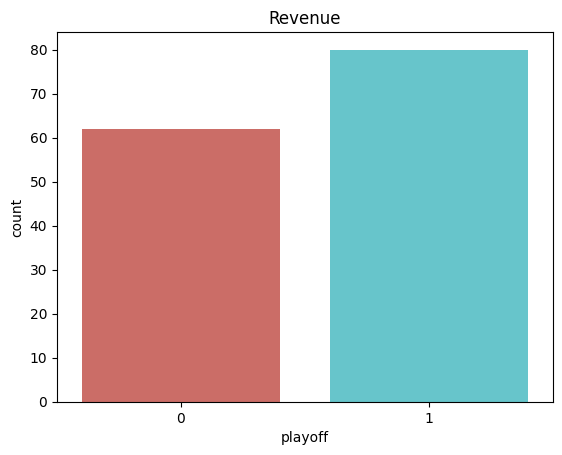

In [5]:
replace_dict = {"Y": 1, "N": 0}
df_teams['playoff']= df_teams['playoff'].replace(replace_dict)

sb.countplot(x='playoff',data=df_teams, palette='hls')
plt.title("Revenue")
plt.show()

In [6]:

def train_evaluate_decision_tree(model, data, target_col="playoff"):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    years_tested = []

    # Sort the data by the "year" column
    data = data.sort_values(by="year")

    years = sorted(data["year"].unique())

    for year in years[2:]:
        print(year)
        # Split the data into training and test sets
        train_data = data[data["year"] < year]
        test_data = data[data["year"] == year]

        X_train = train_data.drop(target_col, axis=1)
        y_train = train_data[target_col]
        X_test = test_data.drop(target_col, axis=1)
        y_test = test_data[target_col]

        # Create and train the decision tree model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate accuracy and precision
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        years_tested.append(year)

    return years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores


In [7]:
model = DecisionTreeClassifier()
years_tested, accuracy_scores, precision_scores, recall_scores, f1_scores = train_evaluate_decision_tree(model, df_teams)
accuracy_scores, precision_scores, recall_scores, f1_scores

3
4
5
6
7
8
9
10


([0.75,
  0.7142857142857143,
  0.9230769230769231,
  0.9230769230769231,
  0.8571428571428571,
  0.7692307692307693,
  0.7857142857142857,
  0.6153846153846154],
 [0.75, 0.75, 1.0, 1.0, 1.0, 1.0, 0.7777777777777778, 0.7142857142857143],
 [0.75, 0.75, 0.875, 0.875, 0.75, 0.625, 0.875, 0.625],
 [0.75,
  0.75,
  0.9333333333333333,
  0.9333333333333333,
  0.8571428571428571,
  0.7692307692307693,
  0.823529411764706,
  0.6666666666666666])

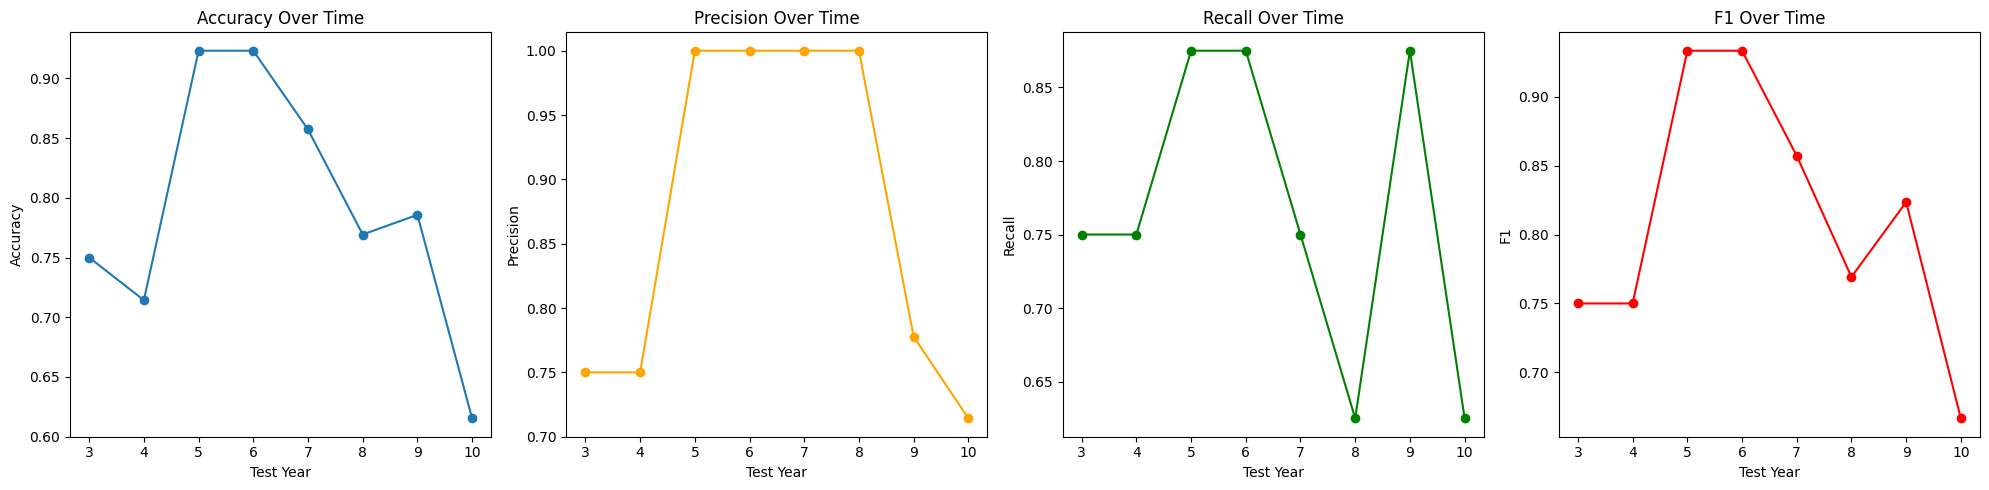

In [8]:
# Create a graph to plot accuracy and precision over time
plt.figure(figsize=(20, 5))

# Plot accuracy
plt.subplot(1, 4, 1)
plt.plot(years_tested, accuracy_scores, marker='o')
plt.title('Accuracy Over Time')
plt.xlabel('Test Year')
plt.ylabel('Accuracy')

# Plot precision
plt.subplot(1, 4, 2)
plt.plot(years_tested, precision_scores, marker='o', color='orange')
plt.title('Precision Over Time')
plt.xlabel('Test Year')
plt.ylabel('Precision')

# Plot recall
plt.subplot(1, 4, 3)
plt.plot(years_tested, recall_scores, marker='o', color='green')
plt.title('Recall Over Time')
plt.xlabel('Test Year')
plt.ylabel('Recall')

# Plot f1
plt.subplot(1, 4, 4)
plt.plot(years_tested, f1_scores, marker='o', color='red')
plt.title('F1 Over Time')
plt.xlabel('Test Year')
plt.ylabel('F1')


plt.tight_layout()
plt.show()